In [1]:
%matplotlib inline

In [2]:
import LFPy
import lfpykit
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# LFPy.Cell parameters
cellParameters = {
    'morphology': 'L5_Mainen96_LFPy.hoc',  # morphology file
    'v_init': -65,                         # initial voltage
    'cm': 1.0,                             # membrane capacitance
    'Ra': 150,                             # axial resistivity
    'passive': True,                       # insert passive channels
    'passive_parameters': {"g_pas": 1. / 3E4,
                           "e_pas": -65},  # passive params
    'dt': 2**-4,                           # simulation time res
    'nsegs_method': 'lambda_f',    # discretization rule
    'lambda_f': 1000               # frequency (Hz)
}

# create LFPy.Cell instance
cell = LFPy.Cell(**cellParameters)
cell.set_rotation(x=4.98919, y=-4.33261, z=0.)

print(f'total number of segments: {cell.totnsegs}')

# parameters for line source potential
el_params = dict(
    x = np.linspace(0, 1000, 1001),
    y = np.zeros(1001),
    z = np.zeros(1001),
    sigma = 0.3
)

cell.simulate(rec_imem=True)

# create line-source potential predictor
lsp = lfpykit.LineSourcePotential(cell, **el_params)

total number of segments: 3078


In [4]:
%%prun -s cumulative -q -l 20 -T prun0
for i in range(100):
    lsp.get_transformation_matrix()
print(open('prun0', 'r').read())

OMP: Info #271: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


         2500808 function calls (2485608 primitive calls) in 4.240 seconds

   Ordered by: cumulative time
   List reduced from 453 to 20 due to restriction <20>

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    4.240    4.240 {built-in method builtins.exec}
        1    0.029    0.029    4.240    4.240 <string>:1(<module>)
      100    0.005    0.000    3.886    0.039 models.py:438(get_transformation_matrix)
      100    1.896    0.019    1.900    0.019 models.py:460(_get_transform)
      100    0.001    0.000    1.586    0.016 dispatcher.py:388(_compile_for_args)
62600/62500    1.088    0.000    1.582    0.000 ffi.py:149(__call__)
      100    0.002    0.000    1.568    0.016 dispatcher.py:915(compile)
      100    0.000    0.000    1.551    0.016 caching.py:639(load_overload)
      100    0.001    0.000    1.533    0.015 caching.py:650(_load_overload)
      100    0.000    0.000    1.447    0.014 caching.py:404(rebuild)
      100

In [5]:
M = lsp.get_transformation_matrix()
M.shape

(1001, 3078)

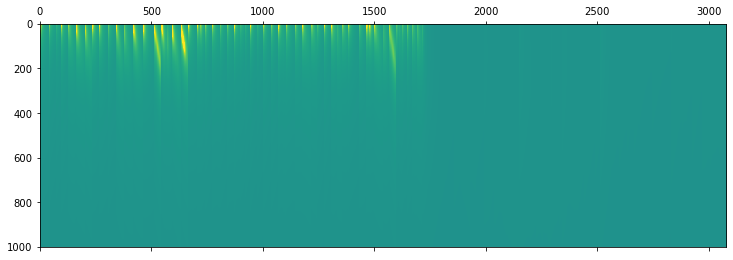

In [6]:
plt.matshow(M, vmin=-0.01, vmax=0.01)

In [7]:
cell.imem.shape

(3078, 1601)